In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [3]:
# Print basic dataset information
print("Number of training images:", len(x_train))
print("Number of test images:", len(x_test))
print("Image shape:", x_train.shape[1:])
print("Number of classes:", len(set(y_train.flatten())))
print("Class names:", tf.keras.utils.to_categorical(y_train).shape)

Number of training images: 50000
Number of test images: 10000
Image shape: (32, 32, 3)
Number of classes: 2
Class names: (50000, 10, 2)


In [4]:
# Define function to display images with labels
import matplotlib.pyplot as plt
def show_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].reshape((32, 32, 3)))
    plt.title(f"Label: {tf.keras.utils.to_categorical(labels)[i].argmax()}")
    plt.axis('off')
  plt.show()

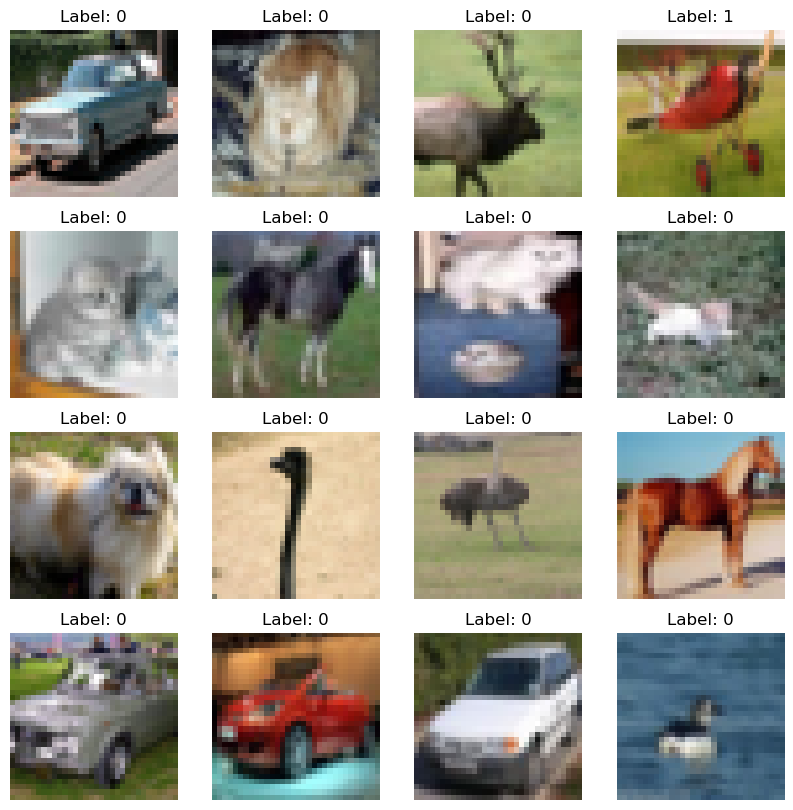

In [5]:
# Display 16 random images from training set
show_images(x_train[32:50], y_train[32:50])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(10, activation='softmax')
])

D:\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, batch_size=16,
          epochs=20,
          validation_data=(x_test, y_test))


Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.3041 - loss: 1.8626 - val_accuracy: 0.5397 - val_loss: 1.3180
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4840 - loss: 1.4335 - val_accuracy: 0.5927 - val_loss: 1.1696
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5313 - loss: 1.3029 - val_accuracy: 0.6256 - val_loss: 1.0871
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.5660 - loss: 1.2240 - val_accuracy: 0.6307 - val_loss: 1.0484
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.5879 - loss: 1.1657 - val_accuracy: 0.6456 - val_loss: 1.0233
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5959 - loss: 1.1289 - val_accuracy: 0.6562 - val_loss: 0.9923
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6180 - loss: 1.0688 - val_accuracy: 0.6522 - val_loss: 0.9890
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.6262 - loss: 1

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6882 - loss: 0.9242
Test accuracy: 0.6898000240325928
